In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ARIMA 모형 (자동 회귀 누적 이동 평균)


>   자기 회귀(AR)과 이동 평균(MA)을 둘 다 고려한 모형입니다. <br/>
>   과거 데이터의 선형 관계뿐만 아니라 추세까지 고려한 모형이다.

### ARIMA(p,d,q)
*   p : 자기 회귀 차수
*   d : 차분 차수
*   q : 이동 평균 차수


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -197.350
Method:                       css-mle   S.D. of innovations             66.436
Date:                Sun, 19 Jun 2022   AIC                            408.699
Time:                        09:43:53   BIC                            419.587
Sample:                    02-01-1991   HQIC                           412.458
                         - 12-01-1993                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4256      3.774      3.292      0.003       5.028      19.823
ar.L1.D.Sales    -1.0850      0.188     -5.764      0.000      -1.454      -0.716
ar.L2.D.Sales    -0.6688      0.283     

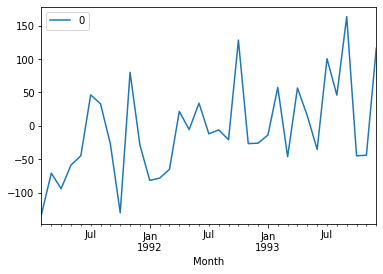

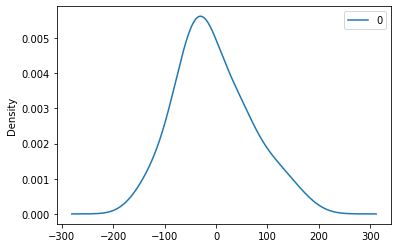

                0
count   35.000000
mean    -5.569279
std     70.272665
min   -132.525615
25%    -45.563840
50%    -20.763497
75%     39.933164
max    163.552090


In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# 시간을 표현하는 함수 정의
def parser(x):
    return datetime.strptime('199' + x , '%Y-%m')

series = read_csv('/content/drive/MyDrive/DL_example/딥러닝 텐서플로 교과서/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

>   strptime()은 날짜와 시간 정보를 문자열로 바꾸어 주는 메서드이다. <br/>
>   model.fit(disp=0) : disp=0은 모형을 적용할 때 많은 디버그 정보가 제공되는 것을 비활성화 한다. <br/>
>   model_fit은 model.fit이 학습한 **학습 이력이 저장**되며 정보 중 오차 정보를 얻고자 할 때 **resid**를 사용한다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=[354.37774649], expected=346.3
predicted=[288.62740889], expected=329.7
predicted=[382.81800599], expected=445.4
predicted=[339.54395946], expected=325.9
predicted=[392.89726937], expected=449.3
predicted=[354.48795155], expected=411.3
predicted=[452.20012418], expected=417.4
predicted=[406.80615758], expected=545.5
predicted=[430.16207955], expected=477.6
predicted=[492.74531837], expected=687.0
predicted=[493.60467515], expected=435.3
predicted=[657.39724671], expected=587.3
predicted=[522.09116238], expected=676.9
Test MSE : 8074.989


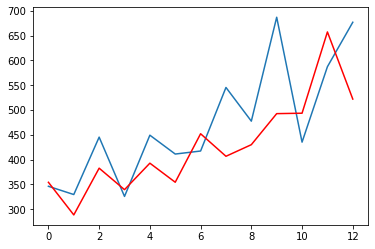

In [ ]:
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# 시간을 표현하는 함수 정의
def parser(x):
    return datetime.strptime('199' + x , '%Y-%m')

series = read_csv('/content/drive/MyDrive/DL_example/딥러닝 텐서플로 교과서/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
x = series.values
x = np.nan_to_num(x)
size = int(len(x) * 0.66)
train, test = x[0:size] , x[size:len(x)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat}, expected={obs}')

error = mean_squared_error(test, predictions)
print('Test MSE : %.3f'%error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

>   model_fit.forecast()를 통해 예측을 수행한다. <br/>
>   yhat : 모델이 예측한 값을 저장 / predictions : 예측한 값을 저장하는 리스트 <br/>
>   obs는 test값을 하나씩 주어 history 리스트에 하나씩 추가하면서, 다음의 예측을 반복적으로 수행하기 위한 변수이다.


In [ ]:
print(series.values)

[266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 249.9 431.6 266.5 346.3
 329.7 445.4 325.9 449.3 411.3 417.4 545.5 477.6 687.  435.3 587.3 676.9]


In [ ]:
print(x[:size])

[266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 249.9 431.6 266.5]


In [ ]:
print(output)

(array([522.09116238]), array([63.37371604]), array([[397.88096138, 646.30136338]]))


In [ ]:
print(predictions)

[array([354.37774649]), array([288.62740889]), array([382.81800599]), array([339.54395946]), array([392.89726937]), array([354.48795155]), array([452.20012418]), array([406.80615758]), array([430.16207955]), array([492.74531837]), array([493.60467515]), array([657.39724671]), array([522.09116238])]


# RNN (Recurrent Neural Network)


*   시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공 신견망
*   이전 은닉층이 현재 은닉층의 입력이 되면서 반복되는 순환구조를 가진다.
*   기족 네크워크와 달리 '기억'을 가지고 있으며, 새로운 입력이 네트워크로 들어올 때마다 기억은 조금씩 수정된다.



![RNNimage](https://velog.velcdn.com/images%2Fyepark%2Fpost%2Ffe335221-b311-4153-b71c-080315b9a40f%2F%EA%B5%AC%E3%85%9C.PNG)


*   첫 번째 입력이 들어오면 첫 번째 기억(h1)이 만들어진다.
*   두 번째 입력이 들어오면 기존 기억(h1)과 새로운 입력을 참고하여 새 기억(h2)을 만든다.
*   RNN은 **외부 입력**과 **자신의 이전 상태**를 입력받아 현재 상태를 갱신한다.



---

![RNNcell](https://thebook.io/img/080263/269.jpg)


*   RNN 계층이 입력된 배치 순서열을 모두 처리한다.
*   RNN 셀은 오직 하나의 단계만 처리한다. (RNN 셀은 RNN 계층의 for loop 구문의 내부라 할 수 있다.)
*   **셀은 실제 계산에 사용되는 RNN 계층의 구성 요소**로 단일 입력과 과거 상태를 가져와서 출력과 새로운 상태를 생성한다.




---

## IMDB 데이터셋 분석하기

In [ ]:
import os
# 케라스에서 발생하는 경고 메시지를 제거
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(22)
np.random.seed(22)
assert tf.__version__.startswith('2.')

batch_size = 128
total_words = 10000
max_review_len = 80
embedding_len = 100

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(10000).batch(batch_size, drop_remainder=True)

test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size, drop_remainder=True)
print('x_train_shape:', x_train.shape, tf.reduce_max(y_train), tf.reduce_min(y_train))
print('x_test_shape:', x_test.shape)

sample = next(iter(test_data))
print(sample[0].shape)

17473536/17464789 [==============================] - 0s 0us/step
x_train_shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test_shape: (25000, 80)
(128, 80)


*   imdb.load_data() : IMDB 데이터셋을 내려받는다. (num_words는 등장 빈도 순위로 몇 번째까지 사용할지를 의미한다.)
*   pad_sequence() : 모델의 입력으로 사용하기 위해서 모든 샘플 길이를 동일하게 맞추어야 한다. (이를 자연어 처리에서는 패딩이라고 한다. / 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춘다.)


## RNN 셀을 이용한 네크워크 생성

In [ ]:
class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.RNNCell0 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.RNNCell1 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.outlayer = tf.keras.layers.Dense(1)
    
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):
            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 20s 60ms/step - loss: 0.5104 - accuracy: 0.7284
Epoch 2/4
195/195 [==============================] - 16s 81ms/step - loss: 0.3147 - accuracy: 0.8690 - val_loss: 0.3972 - val_accuracy: 0.8234
Epoch 3/4
195/195 [==============================] - 11s 58ms/step - loss: 0.2032 - accuracy: 0.9225
Epoch 4/4
195/195 [==============================] - 15s 77ms/step - loss: 0.1030 - accuracy: 0.9628 - val_loss: 0.6047 - val_accuracy: 0.8057


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.0318, accuracy: 99.2788%
테스트 데이터셋 평가...
loss=0.6047, accuracy: 80.5729%
시간: 720.1865139007568


## RNN 계층을 이용한 네트워크 구축

In [ ]:
class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.SimpleRNN(units, dropout=0.5, return_sequences=True),
            tf.keras.layers.SimpleRNN(units, dropout=0.5)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)

        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 24s 103ms/step - loss: 0.5513 - accuracy: 0.7023
Epoch 2/4
195/195 [==============================] - 25s 128ms/step - loss: 0.3627 - accuracy: 0.8487 - val_loss: 0.4003 - val_accuracy: 0.8266
Epoch 3/4
195/195 [==============================] - 22s 111ms/step - loss: 0.3048 - accuracy: 0.8764
Epoch 4/4
195/195 [==============================] - 26s 131ms/step - loss: 0.2440 - accuracy: 0.9050 - val_loss: 0.5218 - val_accuracy: 0.8165


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.0318, accuracy: 99.2788%
테스트 데이터셋 평가...
loss=0.6047, accuracy: 80.5729%
시간: 1826.626000404358


---
## LSTM 셀 구현


*   RNN은 가중치가 업데이트되는 과정에서 1보다 작은 값이 계속 곱해지기 때문에 기울기가 사라지는 기울기 소멸 문제가 발생한다.
*   이를 해결하고자 개발된 모델이 LSTM, GPU가 있다.

![lstm](https://thebook.io/img/080263/286_2.jpg)



*   망각 게이트 : 과거 정보를 어느 정도 기억할지 결정한다.(과거 정보와 현재 데이터를 입력받아 시그모이드를 취한 후 그 값을 과거 정보에 곱해준다.)
*   입력 게이트 : 현재 정보를 기억한다. (과거 정보와 현재 데이터를 입력받아 시그모이드와 하이퍼볼릭 탄젠트 함수를 기반으로 현재 정보에 대한 보존량을 결정한다.)
*   셀 : 각 단계에 대한 은닉 노드를 메모리 셀이라고 한다. (망각 게이트와 입력 게이트의 이전 단계 셀 정보를 계산하여 현재 단계의 셀 상태를 업데이트한다.)
*   출력 게이트 : 과거 정보와 현재 데이터를 사용하여 뉴련의 출력을 결정한다.(이전 은닉 상태와 t번째 입력을 고려해서 다음 은닉 상태를 계산한다.)


In [ ]:
class LSTM_Build(tf.keras.Model):
    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    

            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)

        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 68s 260ms/step - loss: 0.4818 - accuracy: 0.7580
Epoch 2/4
195/195 [==============================] - 69s 352ms/step - loss: 0.3131 - accuracy: 0.8699 - val_loss: 0.3657 - val_accuracy: 0.8374
Epoch 3/4
195/195 [==============================] - 54s 275ms/step - loss: 0.2608 - accuracy: 0.8958
Epoch 4/4
195/195 [==============================] - 60s 311ms/step - loss: 0.2204 - accuracy: 0.9142 - val_loss: 0.4045 - val_accuracy: 0.8302


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1523, accuracy: 95.2925%
테스트 데이터셋 평가...
loss=0.4045, accuracy: 83.0208%
시간: 396.9274115562439


## LSTM 계층 구현

In [ ]:
# LSTM 계층 구현
class LSTM_Build(tf.keras.Model):

    def __init__(self, units):
        super(LSTM_Build, self).__init__()
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len,
                                                input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
                tf.keras.layers.LSTM(units, dropout=0.5, return_sequences=True),
                tf.keras.layers.LSTM(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 80s 356ms/step - loss: 0.4793 - accuracy: 0.7612
Epoch 2/4
195/195 [==============================] - 66s 340ms/step - loss: 0.3123 - accuracy: 0.8710 - val_loss: 0.3707 - val_accuracy: 0.8350
Epoch 3/4
195/195 [==============================] - 45s 232ms/step - loss: 0.2608 - accuracy: 0.8957
Epoch 4/4
195/195 [==============================] - 72s 369ms/step - loss: 0.2226 - accuracy: 0.9141 - val_loss: 0.3940 - val_accuracy: 0.8326


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1623, accuracy: 94.9119%
테스트 데이터셋 평가...
loss=0.3940, accuracy: 83.2612%
시간: 828.6637542247772


## GPU

> 1. GPU는 LSTM에서 사용하는 망각 게이트와 입력 게이트를 하나로 합친 것이며, 별도의 업데이트 게이트가 있다.
2.   컨트롤러가 망각 게이트와 업데이트 게이트를 모두 제어하며, 1을 출력하면 망각 게이트는 열리고 입력 게이트는 닫힌다. 반대로 0을 출력하면 망각 게이트는 닫히고 입력 게이트는 열린다. (즉, 이전 기억이 저장될 때마다 단계별 입력은 삭제된다.)
3.   GPU는 출력 게이트가 없어 전체 상태 벡터가 매 단계마다 출력되며, 이전 상태의 어느 부분이 출력될지 제어하는 새로운 게이트 컨트롤러(후보군)가 별도로 존재한다.


---
<br/>

*   망각 게이트 : 과거 정보를 적당히 초기화시키려는 목적으로, 시그모이드 함수를 출력으로 이용하여 (0,1) 값을 이전 은닉충에 곱한다.
*   업데이트 게이트 : 과거와 현재 정보의 최신화 비율을 결정하는 역할을 한다.
*   후보군 : 현 시점의 정보에 대한 후보군을 계산한다. (과거 은닉층의 정보를 그대로 이용하지 않고 망각 게이트의 결과를 이용하여 후보군을 계산한다.)
*   은닉층 계산 : 업데이트 게이트 결과와 후보군 결과를 결합하여 현 시점의 은닉층을 계산한다.




In [ ]:
class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    
            out0, state0 = self.RNNCell0(word, state0, training)   
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)

        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 46s 140ms/step - loss: 0.5083 - accuracy: 0.7326
Epoch 2/4
195/195 [==============================] - 41s 209ms/step - loss: 0.3150 - accuracy: 0.8670 - val_loss: 0.3564 - val_accuracy: 0.8427
Epoch 3/4
195/195 [==============================] - 27s 139ms/step - loss: 0.2679 - accuracy: 0.8946
Epoch 4/4
195/195 [==============================] - 34s 177ms/step - loss: 0.2284 - accuracy: 0.9113 - val_loss: 0.3877 - val_accuracy: 0.8370


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1564, accuracy: 95.1322%
테스트 데이터셋 평가...
loss=0.3877, accuracy: 83.7019%
시간: 416.1673560142517


## GPU 계층 구현

In [ ]:
# GPU 계층 구현
class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.GRU(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.GRU(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 54s 163ms/step - loss: 0.5045 - accuracy: 0.7330
Epoch 2/4
195/195 [==============================] - 48s 246ms/step - loss: 0.3219 - accuracy: 0.8660 - val_loss: 0.3563 - val_accuracy: 0.8438
Epoch 3/4
195/195 [==============================] - 30s 156ms/step - loss: 0.2589 - accuracy: 0.8966
Epoch 4/4
195/195 [==============================] - 40s 205ms/step - loss: 0.2238 - accuracy: 0.9131 - val_loss: 0.3880 - val_accuracy: 0.8357


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1562, accuracy: 95.2845%
테스트 데이터셋 평가...
loss=0.3880, accuracy: 83.5737%
시간: 800.5125257968903


## 양방향 RNN

>   RNN은 이전 시점의 데이터들을 참고해 정답을 예측하지만, 실제 문제에서는 과거 시점이 아닌 미래 시점의 데이터에 힌트가 있는 경우가 많다. <br/> 따라서 이전 시점의 데이터뿐만 아니라 이후 시점의 데이터도 함께 활용하여 출력 값을 예측하고자 하는 것이 양방향 RNN이다.


*   하나의 출력 값을 예측하는 데 메모리 셀 2개를 사용
*   첫 번째 : 이전 시점의 은닉 상태를 전달받아 현재의 은닉 상태를 계산
*   두 번째 : 다음 시점의 은닉 상태를 전달받아 현재의 은닉 상태를 계산
*   이 값 두개를 모두 출력층에서 출력 값을 예측하는데 사용



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb

n_unique_words = 10000 
maxlen = 200
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Epoch 1/4
196/196 [==============================] - 187s 935ms/step - loss: 0.4538 - accuracy: 0.7782 - val_loss: 0.3130 - val_accuracy: 0.8667
Epoch 2/4
196/196 [==============================] - 182s 928ms/step - loss: 0.2457 - accuracy: 0.9074 - val_loss: 0.3082 - val_accuracy: 0.8678
Epoch 3/4
196/196 [==============================] - 181s 926ms/step - loss: 0.1853 - accuracy: 0.9335 - val_loss: 0.3391 - val_accuracy: 0.8694
Epoch 4/4
196/196 [==============================] - 182s 927ms/step - loss: 0.1373 - accuracy: 0.9514 - val_loss: 0.3996 - val_accuracy: 0.8517


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, acc = model.evaluate(x_train, y_train, batch_size=384, verbose=1)
print ('Training accuracy', model.metrics_names, acc)
print ('Training accuracy', model.metrics_names, loss)
loss, acc = model.evaluate(x_test, y_test, batch_size=384, verbose=1)
print ('Testing accuracy', model.metrics_names, acc)
print ('Testing accuracy', model.metrics_names, loss)

66/66 [==============================] - 37s 554ms/step - loss: 0.1400 - accuracy: 0.9484
Training accuracy ['loss', 'accuracy'] 0.948360025882721
Training accuracy ['loss', 'accuracy'] 0.1399671584367752
66/66 [==============================] - 36s 552ms/step - loss: 0.3996 - accuracy: 0.8517
Testing accuracy ['loss', 'accuracy'] 0.8516799807548523
Testing accuracy ['loss', 'accuracy'] 0.3996061682701111
